In [2]:
import sys
import os
import time
import tracemalloc  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from IPython.display import display, HTML

# Add 'src' to path
sys.path.append(os.path.join(os.getcwd(), 'src'))

# Import Algorithms
from algorithms.kmp import kmp_search, count_comparisons_kmp
from algorithms.boyer_moore import boyer_moore_search, count_comparisons_boyer_moore
from algorithms.native import native_search
# Import Data Generators
from utils.data_generator import generate_synthetic_dna, generate_patterns_from_text, load_genome_from_file

# Style settings
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
print("Environment Ready.")

Environment Ready.


In [3]:
algorithms = {
    "Python Native (Baseline)": native_search,
    "KMP": kmp_search,
    "Boyer-Moore": boyer_moore_search,
    # "Suffix Tree": suffix_tree_search,  
    # "Shift-Or": shift_or_search
}

comparison_algos = {
    "KMP": count_comparisons_kmp,
    "Boyer-Moore": count_comparisons_boyer_moore
}

In [4]:
#Scalability Benchmark (Time & Memory)


DATASET_SIZES = [10_000, 50_000, 100_000, 500_000, 1_000_000]
FIXED_PATTERN_LEN = 20
ITERATIONS = 3

results_scalability = []

print(f"--- Running Scalability Benchmark (Pattern Length: {FIXED_PATTERN_LEN}) ---")

for size in DATASET_SIZES:
    print(f"  > Benchmarking Size: {size} bp...")
    
    # 1. Generate Data (Same for all algos)
    text = generate_synthetic_dna(size)
    pattern = generate_patterns_from_text(text, FIXED_PATTERN_LEN, count=1)[0]
    
    for name, func in algorithms.items():
        
        # A. Time Measurement (Average of 3 runs)
        times = []
        for _ in range(ITERATIONS):
            start = time.perf_counter()
            func(text, pattern)
            end = time.perf_counter()
            times.append(end - start)
        avg_time = sum(times) / len(times)
        
        # B. Memory Measurement (Using your tracemalloc logic)
        tracemalloc.start()
        func(text, pattern)
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        peak_mb = peak / (1024 * 1024)
        
        results_scalability.append({
            "Algorithm": name,
            "Dataset Size": size,
            "Time (s)": avg_time,
            "Memory (MB)": peak_mb
        })

df_scale = pd.DataFrame(results_scalability)
df_scale = df_scale.sort_values(by=["Dataset Size", "Algorithm"])
df_scale.reset_index(drop=True, inplace=True)
print("Scalability Benchmark Complete.")
display(df_scale)

--- Running Scalability Benchmark (Pattern Length: 20) ---
  > Benchmarking Size: 10000 bp...
  > Benchmarking Size: 50000 bp...
  > Benchmarking Size: 100000 bp...
  > Benchmarking Size: 500000 bp...
  > Benchmarking Size: 1000000 bp...
Scalability Benchmark Complete.


,Algorithm,Dataset Size,Time (s),Memory (MB)
0,Boyer-Moore,10000,0.000412,0.001095
1,KMP,10000,0.000927,0.000301
2,Python Native (Baseline),10000,0.000033,0.000088
3,Boyer-Moore,50000,0.001877,0.000416
4,KMP,50000,0.004701,0.000301
5,Python Native (Baseline),50000,0.000084,0.000088
6,Boyer-Moore,100000,0.005706,0.000416
7,KMP,100000,0.009100,0.003319
8,Python Native (Baseline),100000,0.000163,0.000088
9,Boyer-Moore,500000,0.027899,0.000416


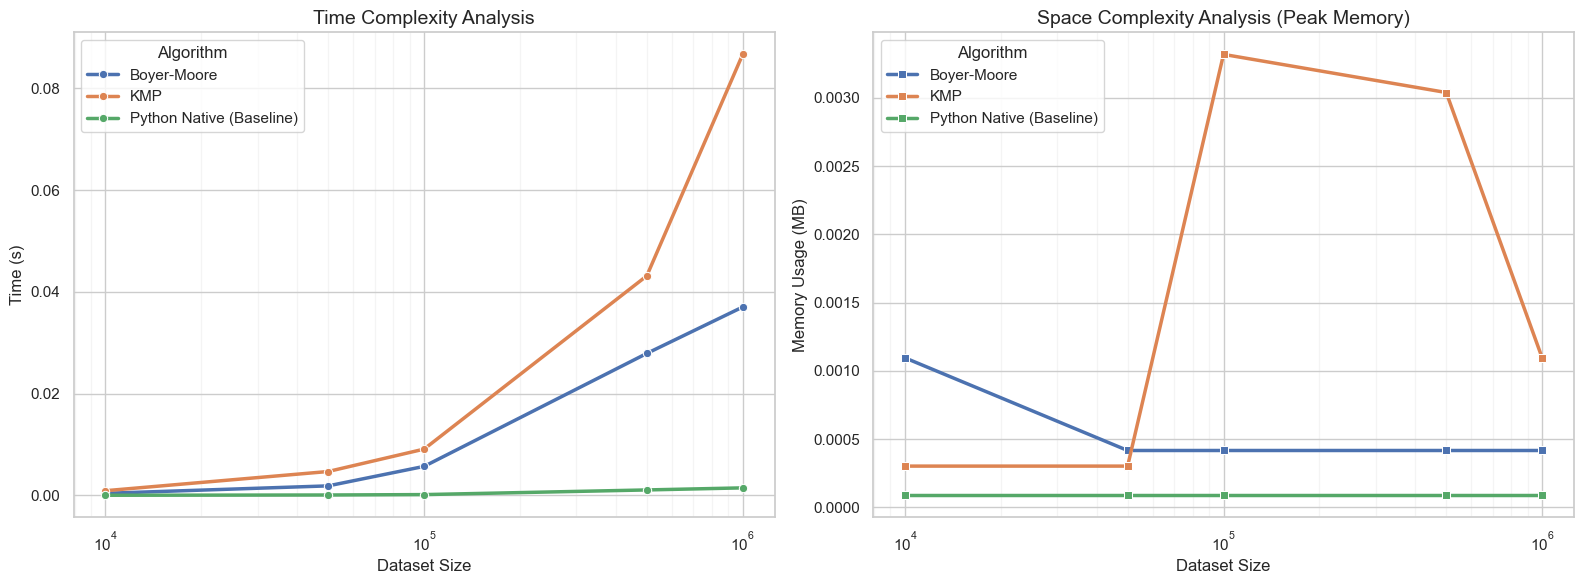

In [5]:
#Plotting Scalability (Time & Memory)


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Time
sns.lineplot(data=df_scale, x="Dataset Size", y="Time (s)", hue="Algorithm", 
             marker="o", linewidth=2.5, ax=axes[0])
axes[0].set_title("Time Complexity Analysis", fontsize=14)
axes[0].set_xscale("log")
axes[0].grid(True, which="minor", alpha=0.2)

# Plot 2: Memory
sns.lineplot(data=df_scale, x="Dataset Size", y="Memory (MB)", hue="Algorithm", 
             marker="s", linewidth=2.5, ax=axes[1])
axes[1].set_title("Space Complexity Analysis (Peak Memory)", fontsize=14)
axes[1].set_xscale("log")
axes[1].set_ylabel("Memory Usage (MB)")
axes[1].grid(True, which="minor", alpha=0.2)

plt.tight_layout()
plt.show()

In [6]:
#Interactive Scalability Chart 


print("Generating Interactive Scalability Chart...")

# Create interactive line plot
fig = px.line(
    df_scale, 
    x="Dataset Size", 
    y="Time (s)", 
    color="Algorithm",
    markers=True,
    log_x=True, # Log scale for x-axis
    log_y=True, # Log scale for y-axis makes the difference clearer
    title="Interactive: Time Complexity Analysis (Hover to see details)",
    labels={"Dataset Size": "Genome Length (bp)", "Time (s)": "Execution Time (seconds)"}
)

# Customize layout
fig.update_layout(hovermode="x unified")
fig.show()

Generating Interactive Scalability Chart...


--- Running Efficiency Benchmark ---


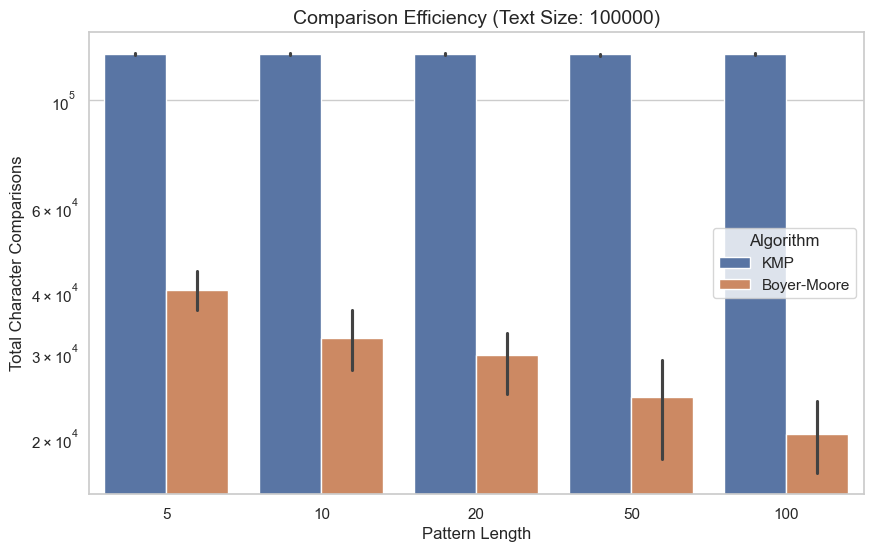

In [7]:
#Efficiency Benchmark (Comparisons)

TEXT_SIZE = 100_000
PATTERN_LENGTHS = [5, 10, 20, 50, 100]
results_comps = []

print("--- Running Efficiency Benchmark ---")
text = generate_synthetic_dna(TEXT_SIZE)

for p_len in PATTERN_LENGTHS:
    patterns = generate_patterns_from_text(text, p_len, count=5)
    
    for pat in patterns:
        for name, func in comparison_algos.items():
            _, comps = func(text, pat)
            results_comps.append({
                "Algorithm": name,
                "Pattern Length": p_len,
                "Comparisons": comps
            })

df_comps = pd.DataFrame(results_comps)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_comps, x="Pattern Length", y="Comparisons", hue="Algorithm")
plt.title(f"Comparison Efficiency (Text Size: {TEXT_SIZE})", fontsize=14)
plt.ylabel("Total Character Comparisons")
plt.yscale("log") # Log scale helps visualize the massive difference
plt.show()

--- Generating Heatmap Data for 3 Algorithms ---


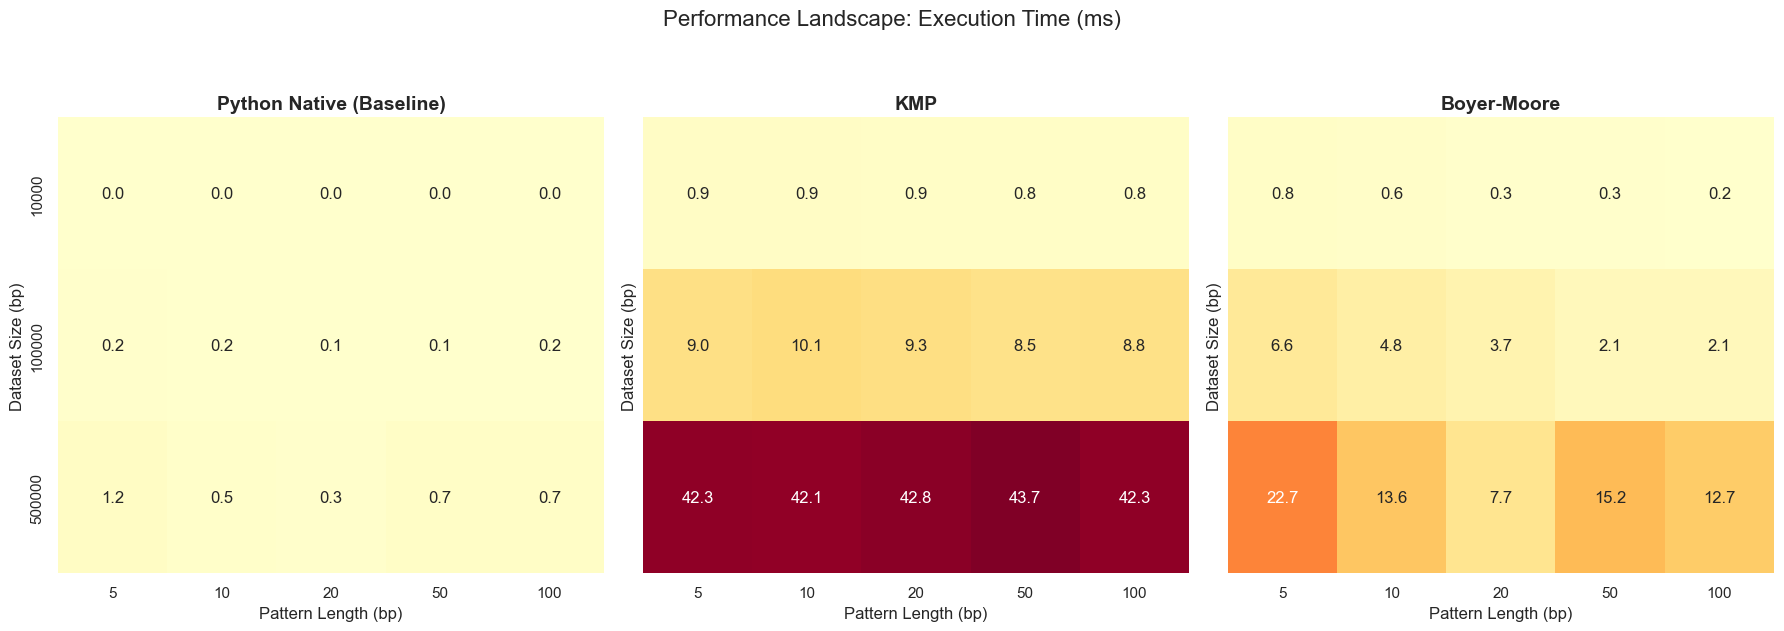

In [8]:
#Comparative Heatmaps (Sensitivity Analysis)
# Generates a Heatmap for EVERY registered algorithm side-by-side


# 1. Configuration for the Heatmap Test
HEATMAP_SIZES = [10_000, 100_000, 500_000] # Y-Axis
HEATMAP_PATS = [5, 10, 20, 50, 100]        # X-Axis
heatmap_results = []

print(f"--- Generating Heatmap Data for {len(algorithms)} Algorithms ---")

# 2. Run the Benchmark
for size in HEATMAP_SIZES:
    # Generate text once per size for fairness
    text_h = generate_synthetic_dna(size)
    
    for p_len in HEATMAP_PATS:
        # Extract valid pattern
        pat_h = generate_patterns_from_text(text_h, p_len, count=1)[0]
        
        for name, func in algorithms.items():
            # Measure time
            start = time.perf_counter()
            func(text_h, pat_h)
            duration_ms = (time.perf_counter() - start) * 1000 
            
            heatmap_results.append({
                "Algorithm": name,
                "Size": size,
                "Pattern Length": p_len,
                "Time (ms)": duration_ms
            })

df_heat = pd.DataFrame(heatmap_results)

# 3. Plotting Side-by-Side
num_algos = len(algorithms)
fig, axes = plt.subplots(1, num_algos, figsize=(6 * num_algos, 6), sharey=True)

# Handle case where there is only 1 algo (makes axes not a list)
if num_algos == 1: axes = [axes]

# Determine max time to normalize color scale (Fair comparison of colors)
max_time = df_heat["Time (ms)"].max()
min_time = df_heat["Time (ms)"].min()

for ax, algo_name in zip(axes, algorithms.keys()):
    # Filter data for this specific algorithm
    algo_data = df_heat[df_heat["Algorithm"] == algo_name]
    
    # Create Matrix (Pivot)
    matrix = algo_data.pivot(index="Size", columns="Pattern Length", values="Time (ms)")
    
    # Plot Heatmap
    # vmin/vmax ensures that "Dark Red" means the same speed across ALL graphs
    sns.heatmap(matrix, annot=True, fmt=".1f", cmap="YlOrRd", 
                ax=ax, cbar=False, vmin=min_time, vmax=max_time)
    
    ax.set_title(f"{algo_name}", fontsize=14, fontweight='bold')
    ax.set_xlabel("Pattern Length (bp)")
    ax.set_ylabel("Dataset Size (bp)")

# Add a shared colorbar manually if needed, or just rely on numbers
plt.suptitle("Performance Landscape: Execution Time (ms)", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

In [9]:
# Genomic Highlight Visualization 


def visualize_matches(text, pattern, algo_name, context=40):
    if algo_name not in algorithms:
        print(f"Warning: {algo_name} not found in registry.")
        return

    func = algorithms[algo_name]
    matches = func(text, pattern)
    
    print(f"\n--- {algo_name} Search Results ---")
    print(f"Pattern: {pattern}")
    print(f"Matches found: {len(matches)}")
    
    if matches:
        first = matches[0]
        start = max(0, first - context)
        end = min(len(text), first + len(pattern) + context)
        
        snippet = list(text[start:end])
        
        # Color the pattern in the snippet
        # Logic: relative position of match in snippet is (first - start)
        rel_pos = first - start
        
        # Apply ANSI Green Color
        snippet.insert(rel_pos, "\033[92m") # Start Green
        snippet.insert(rel_pos + len(pattern) + 1, "\033[0m") # End Color
        
        print(f"Context View ({start}-{end}):")
        print("".join(snippet))
        print(" " * rel_pos + "^" * len(pattern))


print("Generating Visualization for ALL Registered Algorithms...")

demo_t = generate_synthetic_dna(1000)
demo_p = generate_patterns_from_text(demo_t, 10, count=1)[0]

# This Loop makes it work for EVERYTHING in your dictionary
for algo_name in algorithms.keys():
    visualize_matches(demo_t, demo_p, algo_name)

Generating Visualization for ALL Registered Algorithms...

--- Python Native (Baseline) Search Results ---
Pattern: CCCTCATTGG
Matches found: 1
Context View (61-151):
CCCGGAATTAGGTCTGTTACTCGTAGCAAACGTATGCGGACCCTCATTGGTCAGGTCCAGCGCATAGGGTAGGATAGGATCTGTACCATG
                                        ^^^^^^^^^^

--- KMP Search Results ---
Pattern: CCCTCATTGG
Matches found: 1
Context View (61-151):
CCCGGAATTAGGTCTGTTACTCGTAGCAAACGTATGCGGACCCTCATTGGTCAGGTCCAGCGCATAGGGTAGGATAGGATCTGTACCATG
                                        ^^^^^^^^^^

--- Boyer-Moore Search Results ---
Pattern: CCCTCATTGG
Matches found: 1
Context View (61-151):
CCCGGAATTAGGTCTGTTACTCGTAGCAAACGTATGCGGACCCTCATTGGTCAGGTCCAGCGCATAGGGTAGGATAGGATCTGTACCATG
                                        ^^^^^^^^^^


In [10]:
#  Approximate Matching Benchmark (Varying 'k' Mismatches)

# This satisfies the requirement:
# "Variation: Varied k values (e.g., k=1 or k=5) for Shift-Or..."


approx_algorithms = {
    # "Shift-Or": shift_or_search,
    # "Levenshtein": levenshtein_search
}

if approx_algorithms:
    K_VALUES = [1, 2, 3, 4, 5]
    TEXT_SIZE = 100_000
    PATTERN_LEN = 20
    
    results_approx = []
    
    print(f"--- Running Approximate Matching Benchmark (Text: {TEXT_SIZE}bp) ---")
    
    # Generate data once
    text = generate_synthetic_dna(TEXT_SIZE)
    # Get a clean pattern
    clean_pattern = generate_patterns_from_text(text, PATTERN_LEN, count=1)[0]
    
    for k in K_VALUES:
        print(f"  > Testing k={k} mismatches...")
        
        # Create a mutated pattern for this specific k
        # using the upgrade we made to utils/data_generator.py
        from utils.data_generator import generate_mutated_pattern
        mutated_pat = generate_mutated_pattern(clean_pattern, k, mutation_type="mix")
        
        for name, func in approx_algorithms.items():
            start = time.perf_counter()
            # Note: Approx algorithms usually take k as a 3rd argument
            func(text, mutated_pat, k) 
            end = time.perf_counter()
            
            results_approx.append({
                "Algorithm": name,
                "K (Mismatches)": k,
                "Time (s)": end - start
            })
            
    df_approx = pd.DataFrame(results_approx)
    print("Approximate Benchmark Complete.")
    display(df_approx)
else:
    print("Skipping Approximate Benchmark: No approximate algorithms registered yet.")

Skipping Approximate Benchmark: No approximate algorithms registered yet.


In [11]:
# Plot Approximate Performance
# Visualizes how error tolerance affects speed


if 'df_approx' in locals() and not df_approx.empty:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_approx, x="K (Mismatches)", y="Time (s)", hue="Algorithm", marker="o")
    
    plt.title("Approximate Matching: Performance vs Error Tolerance (k)", fontsize=14)
    plt.xlabel("Number of Allowed Mismatches (k)")
    plt.ylabel("Execution Time (s)")
    plt.grid(True, alpha=0.3)
    plt.xticks(K_VALUES) # Ensure integer ticks
    plt.show()

In [12]:
#Professional Genome Browser Visualization
def genome_browser_view(text, pattern, algo_name):
    # Find match
    func = algorithms[algo_name]
    matches = func(text, pattern)
    
    if not matches: return
    
    idx = matches[0]
    start = max(0, idx - 50)
    end = min(len(text), idx + len(pattern) + 50)
    
    # Slice strings
    prefix = text[start:idx]
    match = text[idx : idx+len(pattern)]
    suffix = text[idx+len(pattern) : end]
    
    # Create HTML
    html = f"""
    <div style="font-family: monospace; background: #f4f4f4; padding: 15px; border-radius: 5px; border: 1px solid #ccc;">
        <h3 style="margin-top:0;">🧬 Genome Browser: {algo_name}</h3>
        <p><strong>Pattern:</strong> {pattern} | <strong>Position:</strong> {idx}</p>
        <div style="word-wrap: break-word; font-size: 14px; line-height: 1.6;">
            <span style="color: #999;">{prefix}</span>
            <span style="background-color: #ffeb3b; color: #d32f2f; font-weight: bold; border: 1px solid #fbc02d; padding: 0 2px; border-radius: 3px;">
                {match}
            </span>
            <span style="color: #999;">{suffix}</span>
        </div>
    </div>
    """
    display(HTML(html))

print("Rendering HTML Genome View for ALL Algorithms...")
demo_text_html = generate_synthetic_dna(1000)
demo_pat_html = generate_patterns_from_text(demo_text_html, 6, count=1)[0]
for algo_name in algorithms.keys():
    genome_browser_view(demo_text_html, demo_pat_html, algo_name)

Rendering HTML Genome View for ALL Algorithms...
